In [1]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from datetime import datetime
sns.set_style('white')

In [5]:
initial = pd.read_csv('C:/users/rustym/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [17]:
ps = initial[['Date', 'SM_QC_PF', 'PCR cycles', 'Picogreen conc. (pg/uL)', 'Picogreen yield (pg)', 
              'Resolution index', 'Bad dates']]

ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['SM_QC_PF'] = ps['SM_QC_PF'].astype('category')
ps['PCR cycles'] = ps['PCR cycles'].astype('category')
ps['Bad dates'] = ps['Bad dates'].astype('category')

ps = ps[ps['PCR cycles'] == 21]
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps = ps[ps['Bad dates'] != 'x']
ps = ps.drop('Bad dates', 1)

ps['Picogreen conc. (pg/uL)'] = pd.to_numeric(ps['Picogreen conc. (pg/uL)'].str.replace(' ',''), errors='coerce')
ps = ps[ps['Picogreen conc. (pg/uL)'] < 6000]
ps.dropna(subset = ['Resolution index'], inplace=True)
ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Date,SM_QC_PF,PCR cycles,Picogreen conc. (pg/uL),Picogreen yield (pg),Resolution index
1635,2017-04-19,pass,21.0,608.0,NaN,0.923406
1637,2017-04-19,pass,21.0,1536.0,NaN,0.000000
1638,2017-04-19,pass,21.0,582.0,NaN,0.322631
1639,2017-04-19,pass,21.0,1154.0,NaN,0.322631
1640,2017-04-19,pass,21.0,1504.0,NaN,0.000000


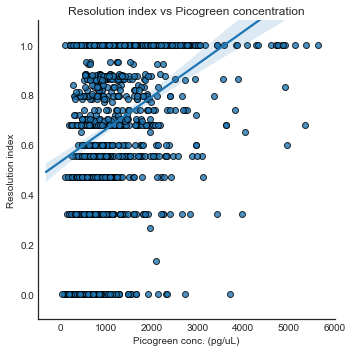

In [42]:
res_vs_pico_conc = sns.lmplot(x='Picogreen conc. (pg/uL)', y='Resolution index', data=ps, 
                              scatter_kws={'linewidths':1,'edgecolor':'k'}, scatter=True, fit_reg=True, palette='deep')
axes = res_vs_pico_conc.axes
axes[0,0].set_ylim(-0.10,1.1)
axes[0,0].set_xlim(-500,6000)
plt.title('Resolution index vs Picogreen concentration')
plt.tight_layout()
plt.savefig('resolution_index_vs_picogreen_conc', dpi=300)